## Cross Validation

We have a linear regression model. We want to ...
- Model the relationship between the dependent variable(target, y) ( features (X)) and a independent variables (features, X)
- predict a target variable (y) based on some features (X)
- correlate linearly the relationship between features (X) and a target variable (y)

In [1]:
import pandas
iris = pandas.read_csv('data/iris.csv')

In [2]:
from sklearn import linear_model
model  = linear_model.LinearRegression()
X = iris[['SepalLength', 'PetalLength']]
y = iris['PetalWidth']

In [3]:
import seaborn, matplotlib

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
#What is the quality of the model?
model.score(X,y)
# This is variance of prediction/variance of bservation.
# VARIANCE = sum (val - average)^2

0.9290248640257686

Validation is about scoring the model against new data
If we don't have new data. a common thing to do is split your data into train and test.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [7]:
#Validation
#1. build model
model.fit(X_train, y_train)
#2. test model
model.score(X_test, y_test)

0.9236632939210253

Different random states give different splits. Each random split is biased. The law of large numbers tells us that we should select many random samples to approach the true mean of the distribution.

In [12]:
def validate(X,y,n):
    scores = [ ]
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        
    return sum(scores)/n

validate(X,y,20)
        

0.9209341385977886

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

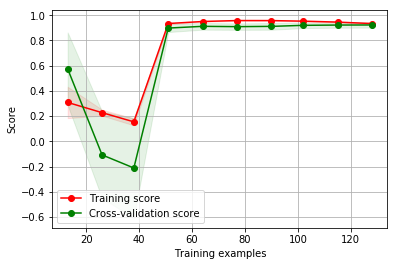

In [14]:
import lcplot
lcplot.plot(model, X, y)

K-fold cross validation

In [15]:
from sklearn.model_selection import KFold, ShuffleSplit
